In [1]:
import os
os.chdir('C:/Avinash/Upgrad/Statistics_EDA/Case_study')
os.getcwd()

'C:\\Avinash\\Upgrad\\Statistics_EDA\\Case_study'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('loan.csv')


C:\Users\avina\AppData\Local\Temp\ipykernel_18872\3429740383.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [103]:
df.head()
#Many columns present with all their values as "NA"

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(39717, 111)

Deleting columns in which all the values are NA

In [7]:
df_1= df.dropna(axis=1,how='all')

In [8]:
df_1.shape

(39717, 57)

In [9]:
df_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Checking other columns in which all or majority of the values are zero

In [10]:
df_1.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [11]:
df_1.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [12]:
df_1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [13]:
df_1.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [14]:
df_1.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [15]:
df_1.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [16]:
df_1.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [17]:
df_1.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [18]:
df_1.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [19]:
df_1.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [20]:
df_1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

Removing several columns, as their elements are all zeroes or a single value

In [21]:
df_2=df_1.drop(['acc_now_delinq','delinq_amnt','chargeoff_within_12_mths','policy_code','application_type','tax_liens','collections_12_mths_ex_med',
               'pymnt_plan','initial_list_status','collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1)

In [22]:
df_2.shape

(39717, 48)

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Data types of columns "term",'int_rate','emp_length' ought to be integers or float, however their data type is Object, this needs to be changed

In [24]:
df_2.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [25]:
df_2.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [26]:
df_2.term=df_2.term.str.replace('months','').astype('int32')
df_2['int_rate']=df_2['int_rate'].str.replace('%','').astype('float64')

In [27]:
df_2.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [28]:
df_2.emp_length=df_2.emp_length.str.replace('<','').astype('object')
df_2.emp_length=df_2.emp_length.str.replace('+','').astype('object')
df_2.emp_length=df_2.emp_length.str.replace('years','').astype('object')
#df_2.emp_length=df_2.emp_length.str.replace('year','').astype('float64')

C:\Users\avina\AppData\Local\Temp\ipykernel_18872\1907836103.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2.emp_length=df_2.emp_length.str.replace('+','').astype('object')


In [29]:
df_2.emp_length

0            10 
1         1 year
2            10 
3            10 
4         1 year
          ...   
39712         4 
39713         3 
39714     1 year
39715     1 year
39716     1 year
Name: emp_length, Length: 39717, dtype: object

In [30]:
df_2.emp_length.fillna(0)

0            10 
1         1 year
2            10 
3            10 
4         1 year
          ...   
39712         4 
39713         3 
39714     1 year
39715     1 year
39716     1 year
Name: emp_length, Length: 39717, dtype: object

In [31]:
df_2.emp_length=df_2.emp_length.str.replace('year','').astype('float64')

In [32]:
df_2.emp_length

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [105]:
#Dropping additional columns, as they may not be useful for this analysis
df_3=df_2.drop(['url','desc'],axis=1)

In [34]:
df_3.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

dropping columns "mths_since_last_record" and "next_pymnt_d" and "mths_since_last_delinq" as majority of its values are missing

In [35]:
df_3.drop(['mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],axis=1,inplace=True)

In [36]:
df_3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [37]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int32  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  float64
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

removing "%" symbol from column "revol_util"

In [38]:
df_3.revol_util =df_3.revol_util.str.replace('%','').astype('float64')

In [106]:
#Checking the target column "loan_status"
df_3.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Converting the column "issue_d" into correct format and making additional columns "Month" and "year"

In [40]:
df_3.issue_d=pd.to_datetime(df_3.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [41]:
df_3.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [42]:
df_3['year']=pd.DatetimeIndex(df_3['issue_d']).year

In [43]:
df_3['Month']=pd.DatetimeIndex(df_3['issue_d']).month

In [44]:
df_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,Month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,2011,12


Checking additional columns in which majority of the values are zeroes, as these columns will not help in further analysis

In [45]:
df_3.out_prncp.value_counts()

0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1137, dtype: int64

In [46]:
df_3.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [47]:
df_3.collection_recovery_fee.value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [48]:
df_3.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [49]:
df_3.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [112]:
df_4=df_3.drop(['out_prncp','recoveries','collection_recovery_fee','total_rec_late_fee'],axis=1)

In [113]:
df_4.shape

(39717, 42)

In [114]:
df_4.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [115]:
df_4.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [116]:
df_4.out_prncp_inv.value_counts()

0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp_inv, Length: 1138, dtype: int64

Dropping some more columns

In [117]:
df_4.drop(['delinq_2yrs','pub_rec','out_prncp_inv','zip_code','pub_rec_bankruptcies'],axis=1,inplace=True)

In [118]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  int32  
 6   int_rate                39717 non-null  float64
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  float64
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

Univariate and bivariate analysis

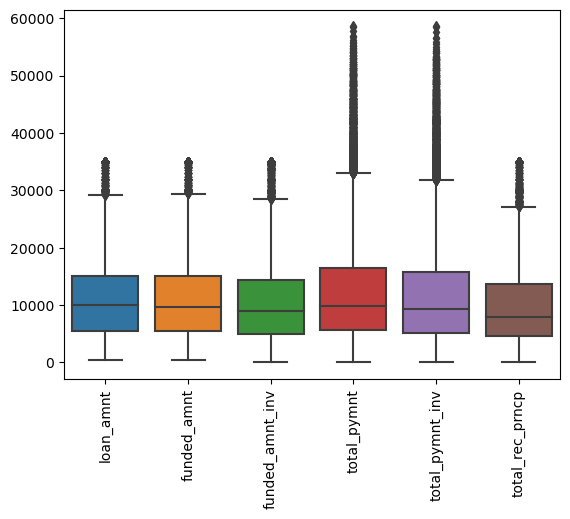

In [120]:
sns.boxplot(data=df_4[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp']])
plt.xticks(rotation=90)
plt.show()
#outliers are present for the columns "total_pymnt" and "total_pymnt_inv".
#However the  median values of all the columns are almost the same, signifying a possible strong correlation

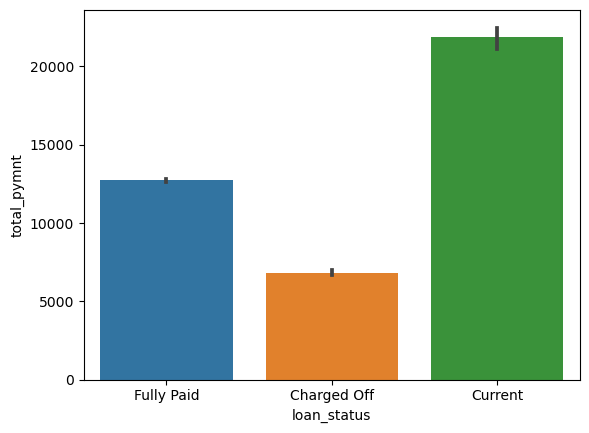

In [121]:
sns.barplot(data=df_4, x='loan_status',y='total_pymnt')
plt.show()

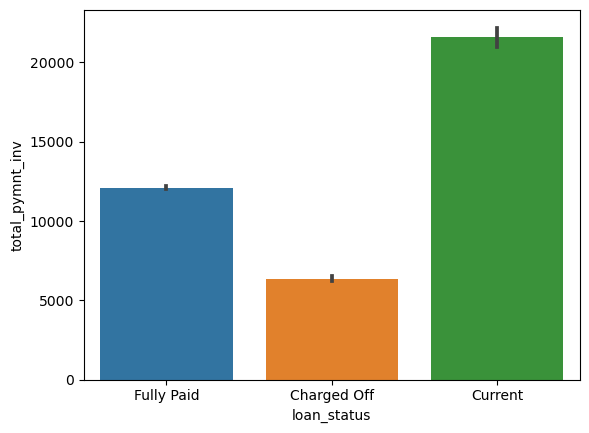

In [122]:
sns.barplot(data=df_4, x='loan_status',y='total_pymnt_inv')
plt.show()

the attributes "total_pymnt" and "total_pymnt_inv" have an inverse relationship with loan defaulting, as higher is the amount paid by the customer, fewer are the chances of defaulting

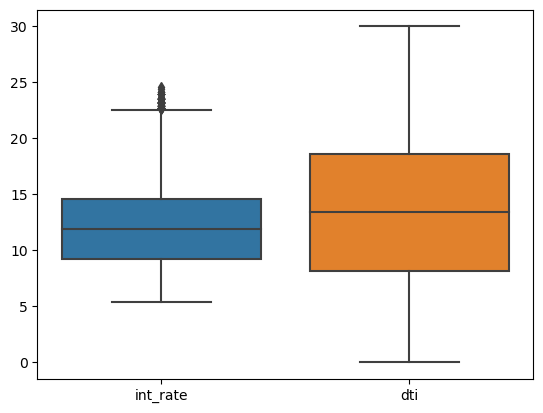

In [123]:
sns.boxplot(data=df_4[['int_rate','dti']])
plt.show()
#no outliers

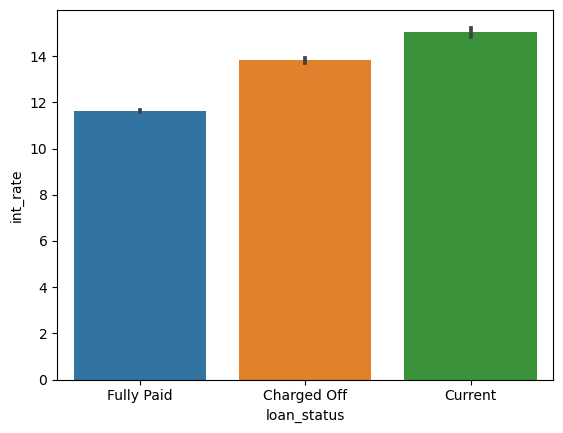

In [124]:
sns.barplot(data=df_4, x='loan_status',y='int_rate') 
plt.show()
#Higher interest rates (greater than 12%), have higher chances of loan defaults

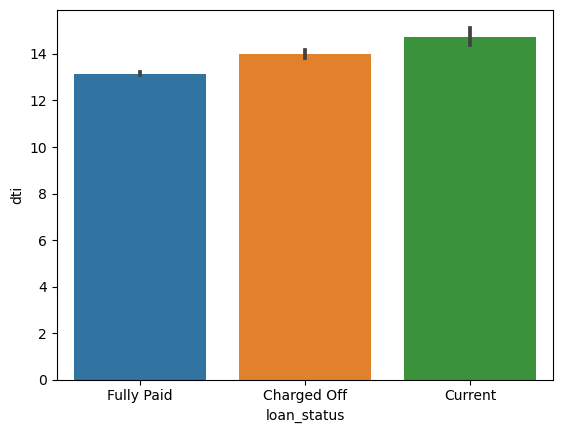

In [125]:
sns.barplot(data=df_4, x='loan_status',y='dti')
plt.show()
# 'dti'> 13 may have an impact on loan defauls

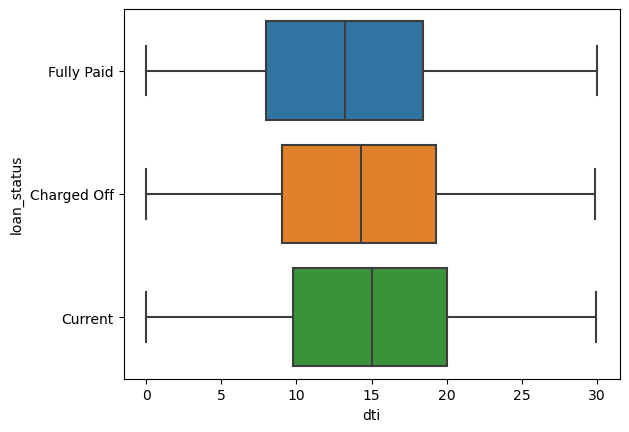

In [61]:
sns.boxplot(data=df_4, x='dti',y='loan_status')
plt.show()
#there is no significant difference in median values of dti ratio between "charged off" and "fully paid"

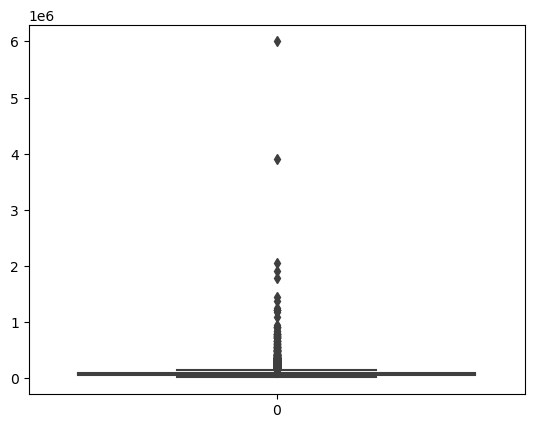

In [126]:
sns.boxplot(data=df_4['annual_inc'])
plt.show()
#here we can see outliers, it is possible for some customers to have high income 

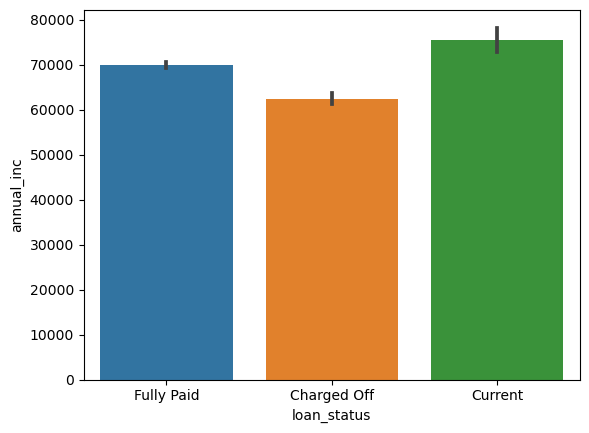

In [127]:
sns.barplot(data=df_4, x='loan_status',y='annual_inc')
plt.show()
#Higher annual income (>60000), leads to lower chances of loan defauls

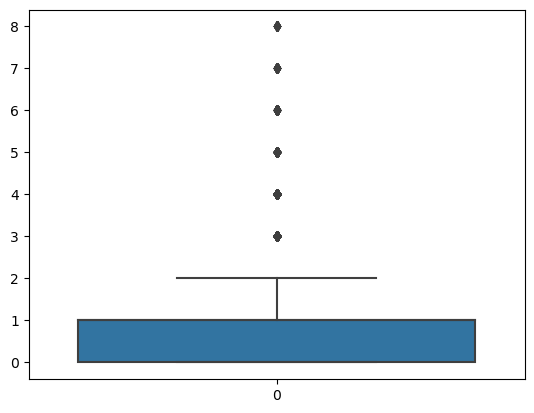

In [128]:
sns.boxplot(data=df_4['inq_last_6mths']) 
plt.show()
# outliers present, this column maynot have direct bearing on loan defaults

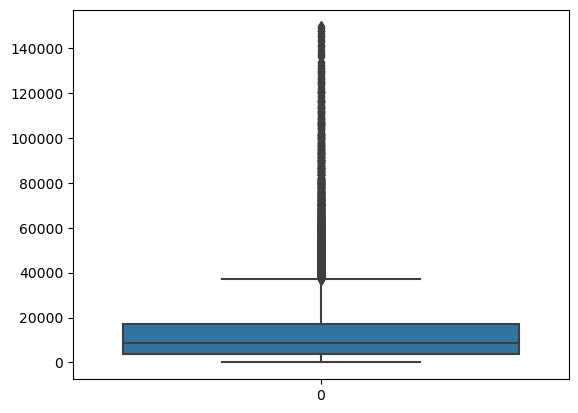

In [129]:
sns.boxplot(data=df_4['revol_bal'])
plt.show()
#outliers are present

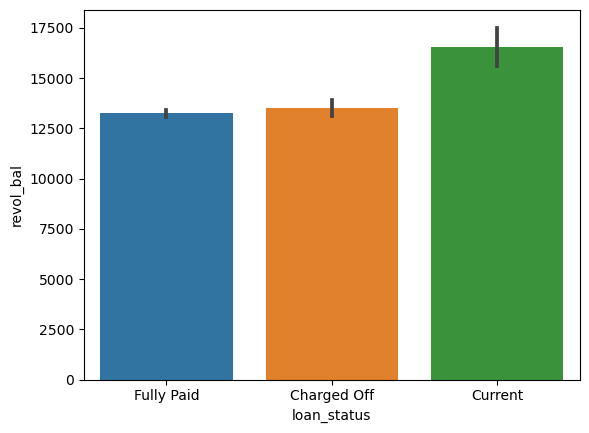

In [130]:
sns.barplot(data=df_4, x='loan_status',y='revol_bal')
plt.show()
#no impact of "revol_bal" on loan defaults

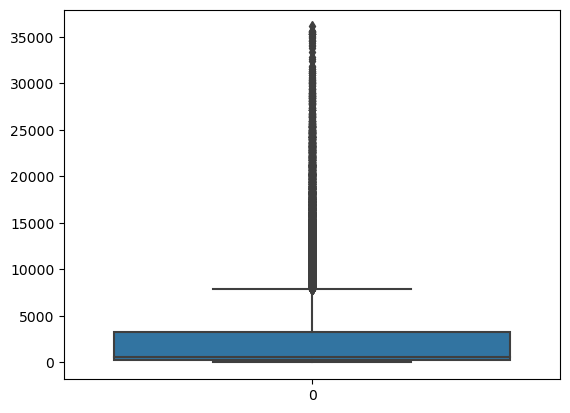

In [131]:
sns.boxplot(data=df_4['last_pymnt_amnt'])
plt.show()
#outliers are present

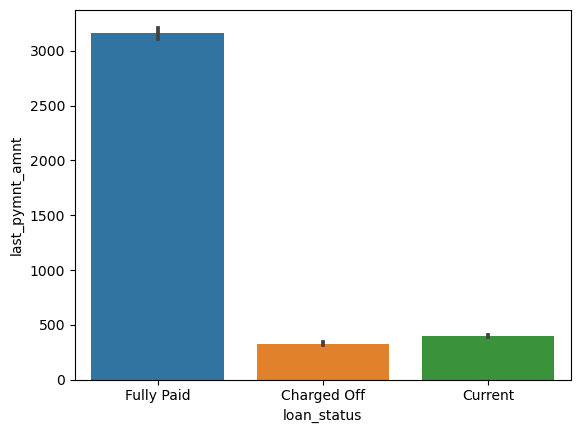

In [132]:
sns.barplot(data=df_4, x='loan_status',y='last_pymnt_amnt')
plt.show()
#Higher is the last paid amount, fewer are the chances of defualting on the loan

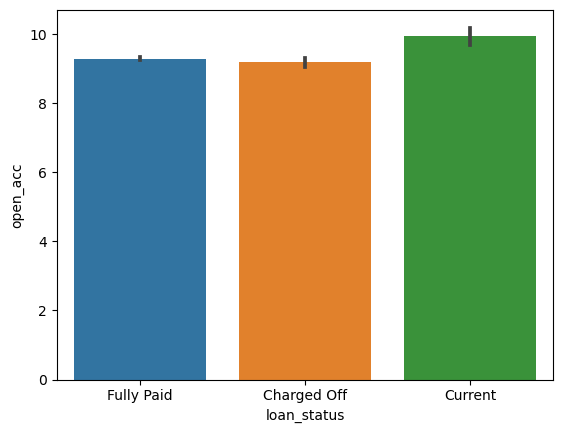

In [134]:
sns.barplot(data=df_4, x='loan_status',y='open_acc')
plt.show()
#no correlation between loan status and open_acc(The number of open credit lines in the borrower's credit file)

including other categorical variables in the barplots with "loan_status" and "int_rate"

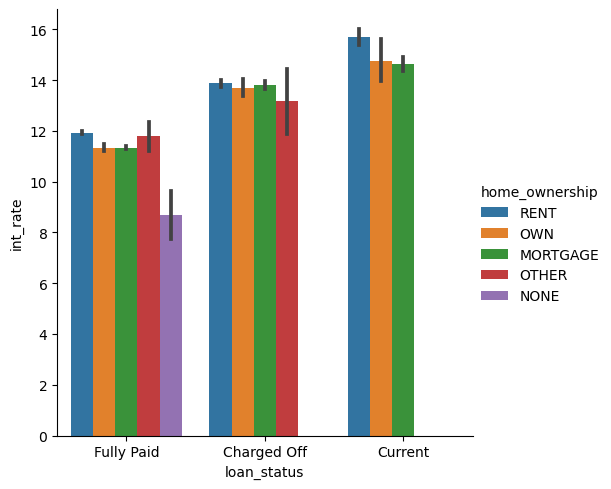

In [135]:
sns.catplot(data=df_4, x="loan_status", y="int_rate", hue="home_ownership", kind="bar")
plt.show()
#higher interest rates(>12%) irrespective of "home_ownership" leads  to loan defaults

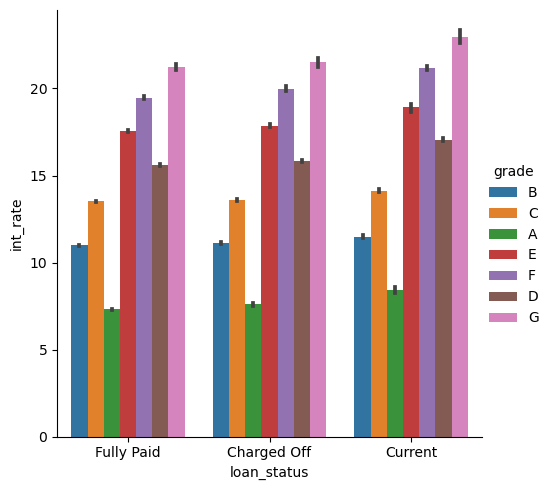

In [71]:
sns.catplot(data=df_4, x="loan_status", y="int_rate", hue="grade", kind="bar")
plt.show()
#no correlation between loan grade and loan defaults

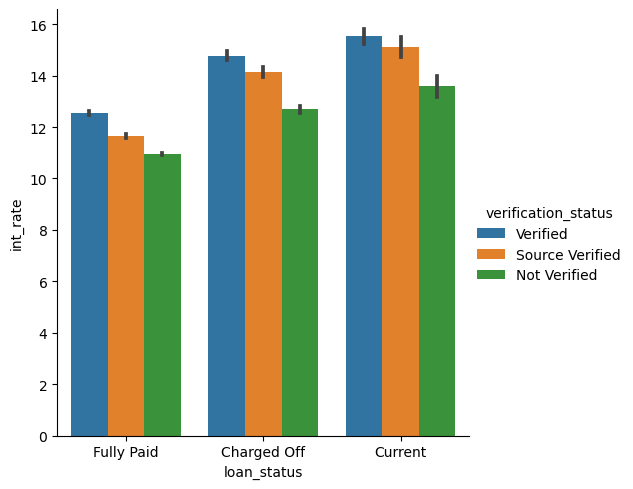

In [72]:
sns.catplot(data=df_4, x="loan_status", y="int_rate", hue="verification_status", kind="bar")
plt.show()
#higher interest rates(>12%) irrespective of "verification status" leads to loan defaults

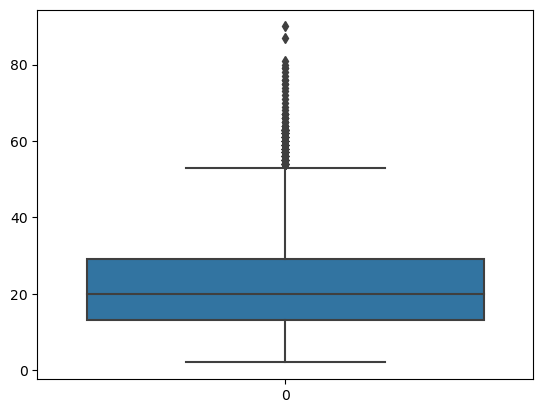

In [139]:
sns.boxplot(data=df_4['total_acc'])
plt.show()

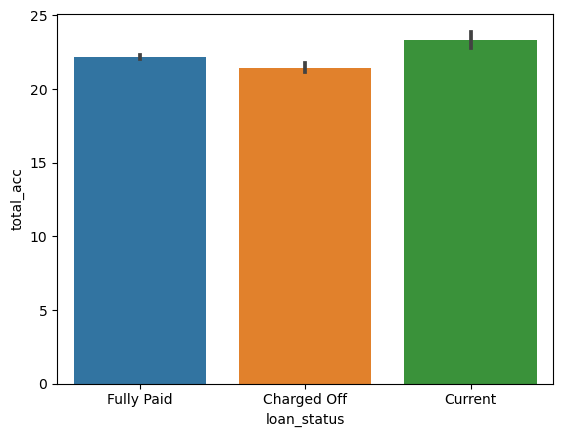

In [74]:
sns.barplot(data=df_4, x='loan_status',y='total_acc')
plt.show()
#"total_acc" refers to the total number of credit lines that the borrower has, this does not have any impact on loan status

Correlation in the dataset

In [75]:
df_4.corr(numeric_only=True)
#"loan_amt" has strong correlation with "funded_amnt","funded_amnt_inv",'installment','total_pymnt','total_pymnt_inv'
#these columns can be dropped from the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,year,Month
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.218589,0.078831,0.086587,0.113486,0.008731,...,0.008763,0.094846,0.042149,0.140045,0.220838,0.112213,0.172856,0.122365,0.846269,0.401693
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,0.117823,0.009380,...,0.005113,0.093118,0.044374,0.139975,0.229307,0.112168,0.173234,0.123627,0.882335,0.377965
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.154473,0.271149,...,0.317597,0.066149,0.256442,0.886613,0.854243,0.852021,0.729726,0.448742,0.123414,0.066677
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.154030,0.266965,...,0.310392,0.069962,0.250589,0.903160,0.870799,0.870255,0.737469,0.453133,0.133885,0.057436
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.164863,0.254375,...,0.290797,0.074939,0.242854,0.881228,0.913257,0.845848,0.730914,0.442604,0.261641,0.083791
term,0.218589,0.234265,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.113383,0.046675,...,0.072367,0.069834,0.096305,0.333761,0.349767,0.221642,0.529876,0.232915,0.263308,0.059423
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,0.005765,0.053185,...,0.097100,0.467168,-0.043570,0.308268,0.303670,0.186882,0.529913,0.157775,0.056428,0.039791
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.124807,0.270874,...,0.312679,0.095484,0.230824,0.856928,0.817416,0.850773,0.634725,0.401688,0.059459,0.038082
emp_length,0.113486,0.117823,0.154473,0.154030,0.164863,0.113383,0.005765,0.124807,1.000000,0.111838,...,0.153662,0.011874,0.207419,0.139288,0.149362,0.129264,0.126042,0.077382,0.119491,0.026637
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.046675,0.053185,0.270874,0.111838,1.000000,...,0.279961,0.017926,0.235771,0.257980,0.247119,0.259571,0.185476,0.140401,0.010706,0.010812


In [76]:
df_5=df_4.drop(["funded_amnt","funded_amnt_inv",'installment','total_pymnt','total_pymnt_inv'],axis=1)

In [77]:
df_5.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

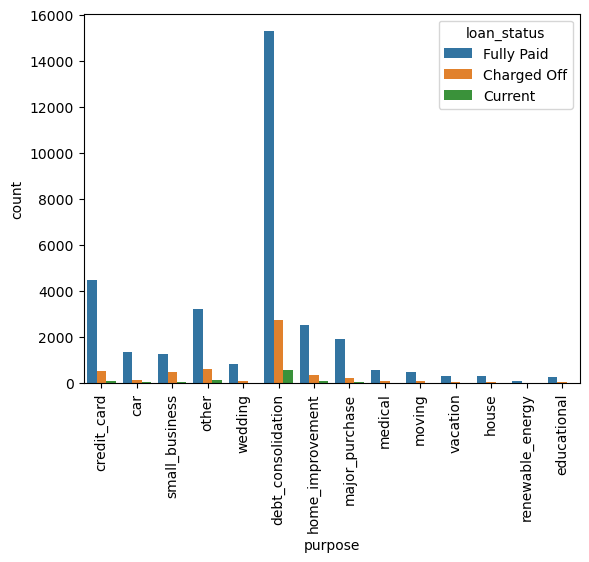

In [78]:
sns.countplot(x='purpose', hue='loan_status', data=df_5)
plt.xticks(rotation=90)
plt.show()
#debt_consolidation being more in number, show higher number of loan defaults compared to other categories

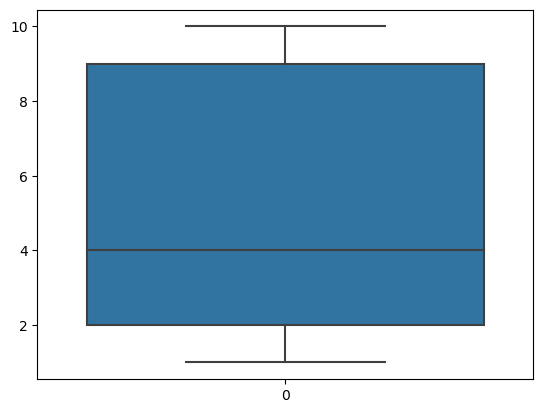

In [136]:
sns.boxplot(df_5['emp_length'])
plt.show()
#"emp_length" pertains to the experience of the individual, here there are no outliers

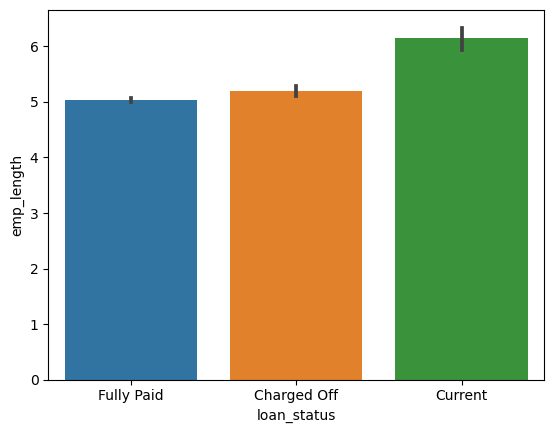

In [137]:
sns.barplot(data=df_5,x='loan_status',y='emp_length')
plt.show()
#there is no impact of experience of an employee over loan status

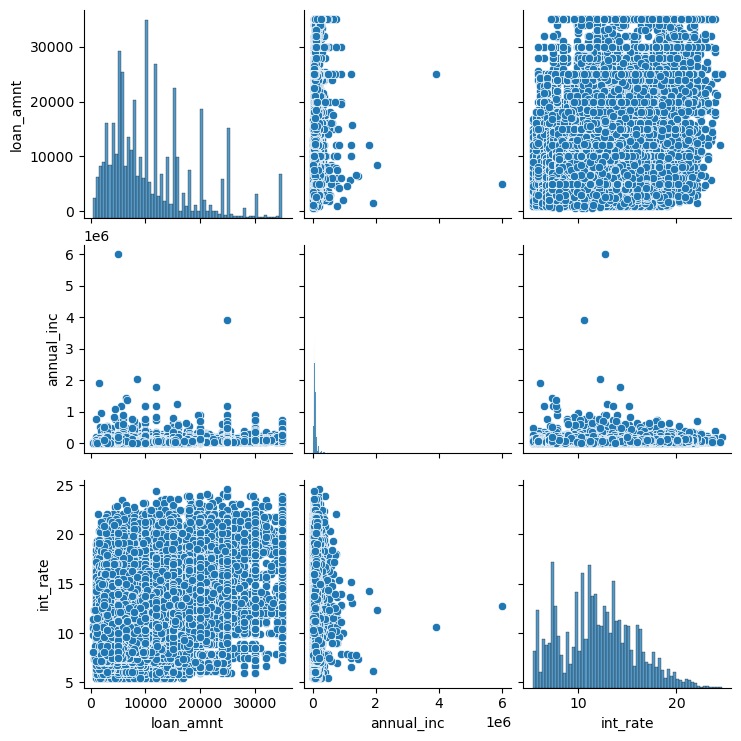

In [81]:
sns.pairplot(df_5[['loan_amnt','annual_inc','int_rate']])
plt.show()
#there is no definitve relationship between loan amount and interest rate
#people with lower annual income (<20000) have taken higher loan amounts, compared to those with higher annual income(>20000)

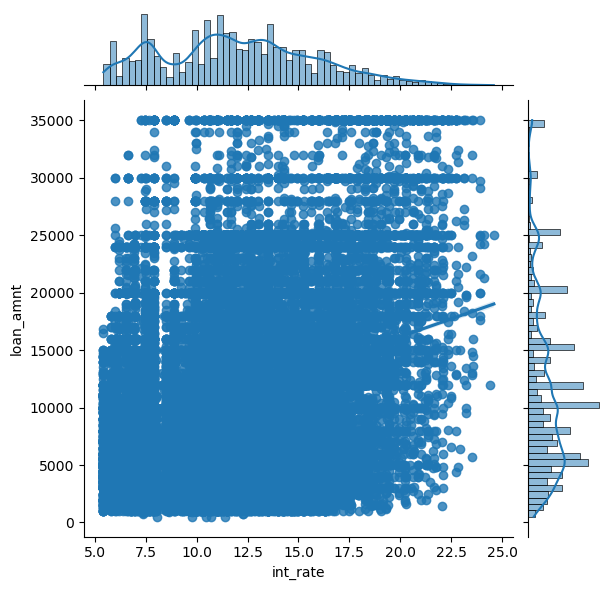

In [138]:
#Checking for any relationship between loan amount and interest rate
sns.jointplot(data=df_5,x=df_5.int_rate,y=df_5.loan_amnt,kind=F'reg')
plt.show()

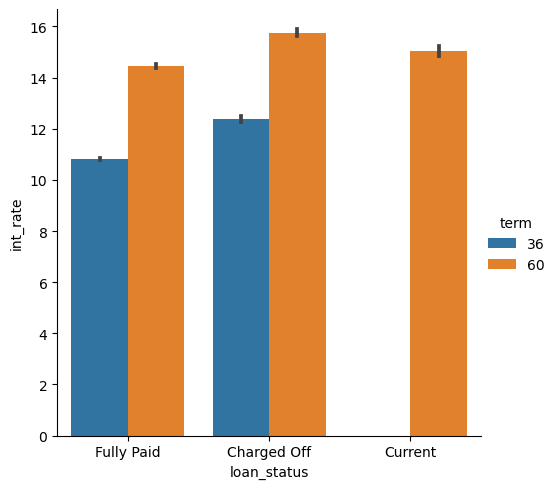

In [82]:
sns.catplot(data=df_5, x="loan_status", y="int_rate", hue="term", kind="bar")
plt.show()
#higher interest rate dictates the possibility of loan default, irrespective of the term

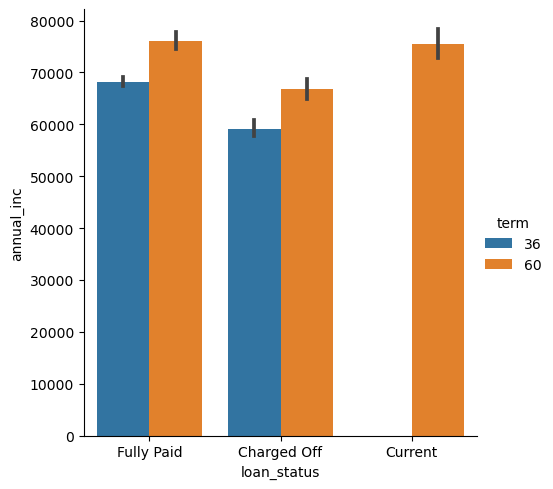

In [83]:
sns.catplot(data=df_5, x="loan_status", y="annual_inc", hue="term", kind="bar")
plt.show()
#higher annual income (>60000),results in lower possibility of loan default irrespective of the term

Removing "Current" type of loan status,as the customers are paying their installments

In [84]:
df_6=df_5[df_5['loan_status']!='Current']

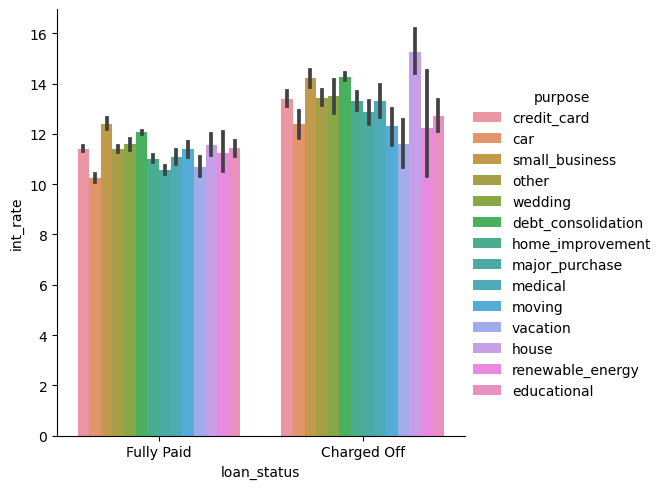

In [85]:
sns.catplot(data=df_6, x="loan_status", y="int_rate", hue="purpose", kind="bar")
plt.show()
#it is observed that the category of  housing loan tends have higher chances of being charged off 
#compared to other categories as the interest rate increased beyond 12-14%

In [86]:
pd.pivot_table(data=df_6,index='purpose',columns="loan_status",values='int_rate')

loan_status,Charged Off,Fully Paid
purpose,,
car,12.372813,10.229178
credit_card,13.405000,11.408515
debt_consolidation,14.275598,12.056410
educational,12.724107,11.427398
home_improvement,13.304006,11.011341
house,15.257966,11.570812
major_purchase,12.860495,10.559061
medical,13.322642,11.083791
moving,12.307717,11.384277


Conclusions:

1) Loans with interest rates greater than 12% have higher chances of being charged off
2) Customers with annual income greater than 60000, have fewer chances of defaulting on their loans
3) From the pivot table, loans such as- "housing","small_business" and "debt_consolidation" have greater risk being charged off compared to other categories if their interest rates are more than 14%

Here the percentage of defaults for each loan purpose is obtained and this percentage is maximum for the "small business" category and second to it is "renewable energy"

In [87]:
#debt_consolidation
debt_charged_prop=(df_5[(df_5['purpose']=='debt_consolidation') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='debt_consolidation'].shape[0])
debt_charged_prop*100

14.843624269084277

In [88]:
#car
car_charged_prop=(df_5[(df_5['purpose']=='car') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='car'].shape[0])
car_charged_prop*100

10.329244673983215

In [89]:
#credit_card
credit_card_charged_prop=(df_5[(df_5['purpose']=='credit_card') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='credit_card'].shape[0])
credit_card_charged_prop*100

10.565302144249513

In [90]:
#educational
educational_charged_prop=(df_5[(df_5['purpose']=='educational') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='educational'].shape[0])
educational_charged_prop*100

17.23076923076923

In [91]:
#home_improvement
home_improvement_charged_prop=(df_5[(df_5['purpose']=='home_improvement') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='home_improvement'].shape[0])
home_improvement_charged_prop*100

11.65994623655914

In [92]:
#house
house_charged_prop=(df_5[(df_5['purpose']=='house') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='house'].shape[0])
house_charged_prop*100

15.485564304461944

In [93]:
#major_purchase
major_purchase_charged_prop=(df_5[(df_5['purpose']=='major_purchase') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='major_purchase'].shape[0])
major_purchase_charged_prop*100

10.150891632373114

In [94]:
#medical
medical_charged_prop=(df_5[(df_5['purpose']=='medical') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='medical'].shape[0])
medical_charged_prop*100

15.295815295815295

In [95]:
#moving
moving_charged_prop=(df_5[(df_5['purpose']=='moving') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='moving'].shape[0])
moving_charged_prop*100

15.780445969125214

In [96]:
#other
other_charged_prop=(df_5[(df_5['purpose']=='other') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='other'].shape[0])
other_charged_prop*100

15.852742299023289

In [97]:
#renewable_energy
renewable_energy_charged_prop=(df_5[(df_5['purpose']=='renewable_energy') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='renewable_energy'].shape[0])
renewable_energy_charged_prop*100

18.446601941747574

In [98]:
#small_business
small_business_charged_prop=(df_5[(df_5['purpose']=='small_business') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='small_business'].shape[0])
small_business_charged_prop*100

25.984682713347922

In [99]:
#vacation
vacation_charged_prop=(df_5[(df_5['purpose']=='vacation') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='vacation'].shape[0])
vacation_charged_prop*100

13.910761154855644

In [100]:
#wedding
wedding_charged_prop=(df_5[(df_5['purpose']=='wedding') & (df_5['loan_status']=="Charged Off")].shape[0])/(df_5[df_5.purpose=='wedding'].shape[0])
wedding_charged_prop*100

10.137275607180571